In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from utils.clean_utils import clean_dataframe

# 1. Read Data

In [2]:
df_raw = pd.read_csv('data/feats_out.csv')

/Users/seramirchandani/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,24,29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 2. Reduce Data

In [3]:
df = clean_dataframe(df_raw)

# 3. EDA and Cleaning

In [4]:
columns = df.columns

In [5]:
df.describe()

,feat_nuc_region_mean_px,feat_nuc_region_median_px,feat_nuc_region_mode_px,feat_nuc_region_min_px,feat_nuc_region_max_px,feat_nuc_region_std_px,feat_nuc_region_entropy_px,feat_nuc_region_histogram_px_1,feat_nuc_region_histogram_px_2,feat_nuc_region_histogram_px_3,...,feat_nuc_obj_mean_degree,feat_nuc_obj_std_degree,feat_nuc_obj_tot_sphericity,feat_nuc_obj_max_spherical_obj,feat_nuc_obj_mean_spherical_obj,feat_nuc_obj_std_spherical_obj,feat_nuc_obj_eigval_1,feat_nuc_obj_eigval_2,feat_nuc_obj_eigval_3,feat_nuc_obj_tot_height
count,21793.000000,21793.000000,2.179300e+04,2.179300e+04,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,...,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000,21793.000000
mean,0.114559,0.113711,5.652002e-04,5.123847e-06,0.421158,0.056545,5.470393,0.057194,0.047472,0.059896,...,1.640335,1.171424,1.028466,1.029741,1.029284,0.000647,130.099235,79.801557,40.329581,29.559216
std,0.077957,0.078648,1.159041e-02,1.587999e-05,0.243949,0.039729,1.058298,0.034038,0.038060,0.047077,...,0.456751,0.364400,0.078677,0.086924,0.080262,0.027291,47.524622,21.925553,14.004247,6.194918
min,0.001428,0.001198,1.541100e-31,1.541100e-31,0.008167,0.001115,0.861620,0.022906,0.000288,0.001520,...,0.000000,0.000000,0.527260,0.527260,0.527260,0.000000,35.053000,23.830600,6.775600,11.000000
25%,0.058383,0.057151,7.643200e-15,6.911100e-15,0.231770,0.029593,4.890000,0.040358,0.027807,0.030316,...,1.600000,1.064600,0.985930,0.986240,0.986200,0.000000,98.974800,64.152900,30.557000,25.000000
50%,0.099325,0.097950,3.408200e-07,2.499200e-07,0.383360,0.048960,5.615000,0.048049,0.035006,0.043649,...,1.733300,1.183200,1.040600,1.040700,1.040600,0.000000,123.129000,77.671600,40.196300,29.000000
75%,0.150350,0.149430,4.373600e-06,3.709900e-06,0.571680,0.072882,6.186500,0.062526,0.051570,0.071955,...,1.833300,1.316600,1.084300,1.084400,1.084300,0.000000,153.173100,93.494700,49.576700,34.000000
max,0.492860,0.522560,1.000000e+00,3.763200e-04,1.000000,0.284240,7.890400,0.919600,0.540500,0.404100,...,4.666700,4.976000,1.215600,3.353100,2.210300,1.676500,1107.645000,214.319500,100.209800,59.000000


In [6]:
df.shape

(21968, 1666)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21968 entries, 0 to 21967
Columns: 1666 entries, structureProteinName to feat_nuc_obj_tot_height
dtypes: float64(1663), object(3)
memory usage: 279.2+ MB


### Remove or Replace NaNs

Looks like most of the columns have a count of 21793 values, however the dataframe has 21968 rows. How many columns have more or less than 21968-21793 (175) NaNs?

In [8]:
for name in columns:
    if df[name].isnull().sum() > 175:
        print 'more than 175', name, df[name].isnull().sum()
    if df[name].isnull().sum() < 175:
        print 'less than 175', name, df[name].isnull().sum()

less than 175 structureProteinName 0
less than 175 cellID 138
less than 175 save_feats_path 0
more than 175 feat_nuc_obj_mean_edge_len 228
more than 175 feat_nuc_obj_std_edge_len 228


Remove all the rows which have NaNs for all columns, using the first column of data (feat_nuc_region_mean_px) as an indicator for the location of NaNs.

In [9]:
df = df[np.isfinite(df['feat_nuc_region_mean_px'])]

In [10]:
for name in columns:
    if df[name].isnull().sum() > 0:
        print name, df[name].isnull().sum()

cellID 3
feat_nuc_obj_mean_edge_len 53
feat_nuc_obj_std_edge_len 53


There are still 53 NaNs to deal with - replace NaNs based on distributions:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d3c57d0>]], dtype=object)

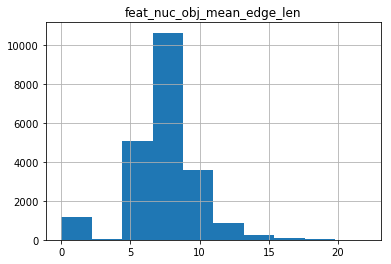

In [11]:
df.hist(column='feat_nuc_obj_mean_edge_len')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c572b10>]], dtype=object)

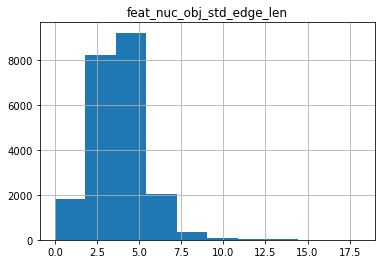

In [12]:
df.hist(column='feat_nuc_obj_std_edge_len')

In [13]:
df['feat_nuc_obj_mean_edge_len'].fillna((df['feat_nuc_obj_mean_edge_len'].mean()), inplace=True)
df['feat_nuc_obj_std_edge_len'].fillna((df['feat_nuc_obj_std_edge_len'].mean()), inplace=True)

In [14]:
for name in columns:
    if df[name].isnull().sum() > 0:
        print name, df[name].isnull().sum()

cellID 3
